In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
# Look at the sample data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Look for the missing values in the columns
df.isna().sum()
# We found no missing values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check for the data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

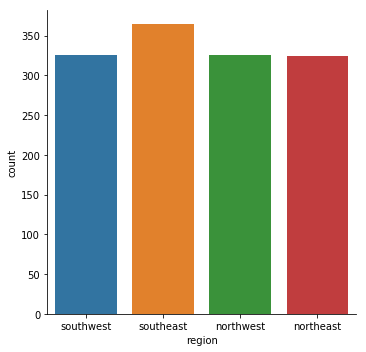

In [7]:
# Checking if an perticular region is dominating the dataset. Its not the case here
sns.catplot(x='region', kind="count", data= df);

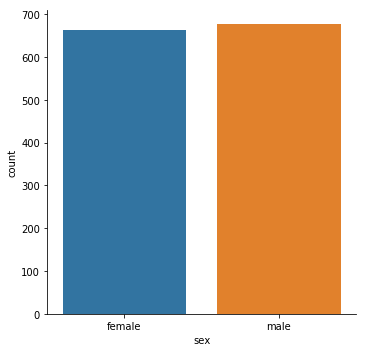

In [8]:
# Checking the same for gender as well. The count is almost the same
sns.catplot(x='sex', kind="count", data= df);

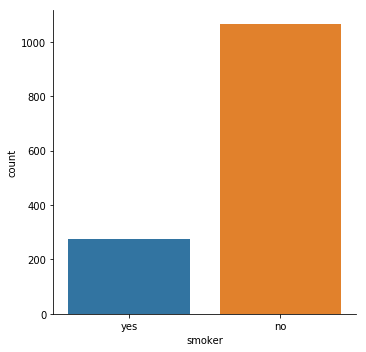

In [9]:
# Checking the same for smoker as well. The count of non smokers are more in the dataset
sns.catplot(x='smoker', kind="count", data= df);

In [10]:
# Checking if there is relationship beteen the mean insurance of smokers and non smokers
mean_smo, mean_non_smo = df['charges'][df['smoker'] == 'yes'].mean(), df['charges'][df['smoker'] == 'no'].mean()
mean_smo, mean_non_smo

(32050.23183153285, 8434.268297856199)

In [11]:
# Lets check for gender as well
mean_male, mean_female = df['charges'][df['sex'] == 'male'].mean(), df['charges'][df['sex'] == 'female'].mean()
mean_male, mean_female

(13956.751177721886, 12569.57884383534)

In [12]:
# Check for BMI higher than the normal range - Assumed normal range as 18.5 to 25
mean_bmi_large, mean_bmi_normal = df['charges'][df['bmi'] > 25].mean(), df['charges'][df['bmi'] <= 25].mean()
mean_bmi_large, mean_bmi_normal

(13946.47603532447, 10284.290025182192)

In [13]:
# One more analysis with age 
# Check for BMI higher than the normal range - Assumed normal range as 18.5 to 25
mean_young, mean_old = df['charges'][df['age'] < 35].mean(), df['charges'][df['age'] >= 35].mean()
mean_young, mean_old

(9673.31690839526, 15773.351087515846)

In [14]:
mean_no_child, mean_child = df['charges'][df['children'] == 0].mean(), df['charges'][df['children'] > 0].mean()
mean_no_child, mean_child

(12365.975601635882, 13949.94109348167)

# Feature Selection

In [15]:
# Lets lookk at our data set once again
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
# Lets dummy code the categorical variables. Dropping coulmns region and children as they hardly contribute to insurance charges
df = df.drop(['children','region'], axis = 1)


In [17]:
cat_var = ['sex','smoker']
df['sex'] = pd.get_dummies(df['sex'], sparse=True)
df['smoker'] = pd.get_dummies(df['smoker'], sparse=True)
df

,age,sex,bmi,smoker,charges
0,19,1,27.900,0,16884.92400
1,18,0,33.770,1,1725.55230
2,28,0,33.000,1,4449.46200
3,33,0,22.705,1,21984.47061
4,32,0,28.880,1,3866.85520
5,31,1,25.740,1,3756.62160
6,46,1,33.440,1,8240.58960
7,37,1,27.740,1,7281.50560
8,37,0,29.830,1,6406.41070
9,60,1,25.840,1,28923.13692


In [18]:
def coladd (age,smoker,bmi):
    if age>35 and smoker ==1 and bmi >25:
        return 1
    else:
        return 0

df['High_Risk'] = df[['age','smoker','bmi']].apply(lambda x: coladd(*x), axis=1)

In [19]:
df['High_Risk'].value_counts()

0    819
1    519
Name: High_Risk, dtype: int64

In [20]:
# Lets see if the mean insurance amount of these individuals are the ver high compared to rest
mean_high_risk, mean_not_high_risk = df['charges'][df['High_Risk'] == 1].mean(), df['charges'][df['High_Risk'] == 0].mean()
mean_high_risk, mean_not_high_risk

(11226.504362427742, 14565.652291402917)

In [21]:
# Lets build one more with ignoring the age and considering onl BMI and smoker
def coladd1 (smoker,bmi):
    if smoker ==1 and bmi >25:
        return 1
    else:
        return 0

df['Medium_Risk'] = df[['smoker','bmi']].apply(lambda x: coladd1(*x), axis=1)

In [22]:
# Checking the same analsis for medium risk individuals
mean_med_risk, mean_not_med_risk = df['charges'][df['Medium_Risk'] == 1].mean(), df['charges'][df['Medium_Risk'] == 0].mean()
mean_med_risk, mean_not_med_risk

(8629.589609712148, 21954.55547444205)

# Model Building

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges', 'High_Risk', 'Medium_Risk'], dtype='object')

In [25]:
X = df[['age', 'sex', 'bmi', 'smoker','High_Risk', 'Medium_Risk']]
Y = df['charges']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [27]:
from sklearn import linear_model

In [28]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
result = regr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, result))
print('Variance score: %.2f' % r2_score(y_test, result))


Mean squared error: 30637726.75
Variance score: 0.79


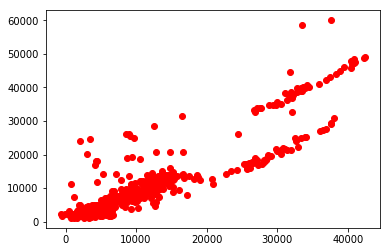

In [29]:
plt.scatter( result, y_test,  color=['red'])

# Using Lasso Regression

In [30]:
from sklearn.linear_model import LassoCV
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=10000
model_lasso= LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter, normalize=True,cv=5)
model_lasso.fit(X_train,y_train)
#To get the variable importance
print(list(zip(model_lasso.coef_,X_train.columns)))
print(model_lasso.intercept_)

[(263.98425805468787, 'age'), (-0.0, 'sex'), (425.4205810355093, 'bmi'), (-20037.039306611387, 'smoker'), (-0.0, 'High_Risk'), (-4617.541287287633, 'Medium_Risk')]
8903.607745718318


In [31]:
y_predited_lasso = model_lasso.predict(X_test)

Text(0,0.5,'Actual Insurance')

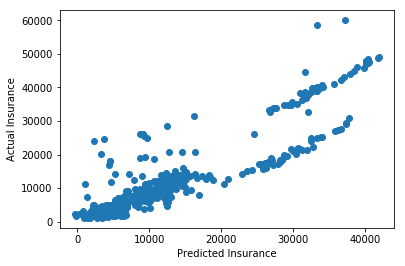

In [32]:
plt.scatter(y_predited_lasso,y_test)
plt.xlabel("Predicted Insurance")
plt.ylabel("Actual Insurance")

In [33]:
print('Variance score: %.2f' % r2_score(y_test, y_predited_lasso))

Variance score: 0.79
